In [297]:
import numpy as np
import ToyQ2
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('Data/UH_RL_rats.csv');
df = df.drop(df.columns[[range(24)]],axis=1);

/Users/maylibooyah69/anaconda2/envs/py3/lib/python3.7/site-packages/pandas/core/indexes/base.py:3969: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  result = getitem(key)


# Packaging into respective subjects

In [298]:
subjects = df['subject'].unique();
sub_df={} # a dictionary whose keys is the subject number
for i in subjects:
    sub_df[i]=df[df['subject']==i]

# Note on the Data:
# the update rule used for the given data is different than ours
### There are 24 subjects (1 to 24)
### each subject has 5 sessions (['1', '11', '16', '6', 'Best'])
### each the rat chose between ([1., 2.]) which turns out to be (['lean', 'rich']) depending on the experiment and then get a reward ([0., 1.])
### reward is the same as response

In [293]:
def get_Logs(sub_df):
    '''Returns a dict of DataFrame indexs as dict[rat number][session name]
    where rat is int from 1 to 24 and session name is 1, 11, 16,6, Best as strings'''
    Logs={}
    for i in sub_df:
        rat=sub_df[i]
        sessions=rat['session'].unique()
        Logs[i]={}
        for j,sesh in enumerate(sessions):
            Logs[i][sesh]={}
            Logs[i][sesh]=rat[rat['session']==sesh]
    return Logs
epoched_df=get_Logs(sub_df)

In [294]:
len(epoched_df[3]['Best'])

300

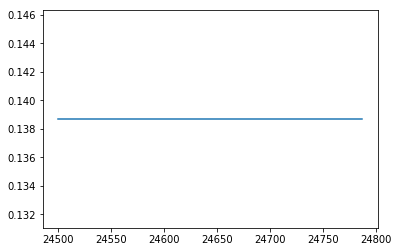

In [295]:
plt.plot(epoched_df[3]['11']['alpha_gain'])

In [296]:
epoched_df[5]['Best']

,session,subject,lever,response,feedback,state,action,reward,alpha_gain,alpha_loss,beta,Q,PE
28344,Best,5,A,lean,0.0,1.0,1.0,0.0,0.261299,0.977482,0.154716,1.125922e-02,-5.000000e-01
28345,Best,5,B,rich,1.0,1.0,2.0,1.0,0.261299,0.977482,0.154716,6.306497e-01,5.000000e-01
28346,Best,5,B,rich,0.0,1.0,2.0,0.0,0.261299,0.977482,0.154716,1.420125e-02,-6.306497e-01
28347,Best,5,A,lean,1.0,1.0,1.0,1.0,0.261299,0.977482,0.154716,2.696165e-01,9.887408e-01
28348,Best,5,A,lean,1.0,1.0,1.0,1.0,0.261299,0.977482,0.154716,4.604652e-01,7.303835e-01
28349,Best,5,A,lean,0.0,1.0,1.0,0.0,0.261299,0.977482,0.154716,1.036896e-02,-4.604652e-01
28350,Best,5,B,rich,1.0,1.0,2.0,1.0,0.261299,0.977482,0.154716,2.717898e-01,9.857988e-01
28351,Best,5,A,lean,0.0,1.0,1.0,0.0,0.261299,0.977482,0.154716,2.334928e-04,-1.036896e-02
28352,Best,5,A,lean,0.0,1.0,1.0,0.0,0.261299,0.977482,0.154716,5.257896e-06,-2.334928e-04
28353,Best,5,A,lean,0.0,1.0,1.0,0.0,0.261299,0.977482,0.154716,1.183996e-07,-5.257896e-06


In [25]:
print('chosing 1:',sum(np.array(sub_df[3]['action']==1).astype(int)))
print('chosing 2:',sum(np.array(sub_df[3]['action']==2).astype(int)))

chosing 1: 671
chosing 2: 793


# Simulation

In [285]:
class RL_env():
    def __init__(self,sub_df):
        '''takes in the data of a rat over one single trial'''
        self.action_size=2
        self.obs_size=2
        self.sub_df=sub_df
        self.QLog=sub_df['Q']
        self.Reward_Log=sub_df['reward']
        self.test_alphaL=sub_df['alpha_loss'].iloc[0] # stored as scaler
        self.test_alphaG=sub_df['alpha_gain'].iloc[0]
        self.test_beta=sub_df['beta'].iloc[0]
        self.PELog=sub_df['PE']
        self.count=0 # counting from 0
    def step(self,action):
        temp=self.Reward_Log.iloc[self.count]+0
        self.count+=1
        return temp

class Srat(ToyQ2.SQFSrat):
    def __init__(self,epoched_df,alphaF=0.2,alphaS=0.1,beta=4,gamma=0):
        self.actionLog=epoched_df['action']
        self.count=0
        self.lhLog=[]
        self.choiceLog=[]
        self.beta=beta
        self.gamma=gamma
        self.env=env
        self.alphaF=alphaF
        self.alphaS=alphaS
        self.action_size=env.action_size
        self.obs_size=env.obs_size
        self.Q=epoched_df['Q'].iloc[0] # Q starts from 0
        self.Qlog=[epoched_df['Q'].iloc[0]]
        self.obsLog=[]
    def get_choice(self):
        self.action=self.actionLog.iloc[self.count]
        if self.action==1:
            self.choice=np.array([0,1])
        if self.action==2: # 2 is going left
            self.choice=np.array([1,0])
        self.count+=1
        self.choiceLog.append(self.choice)
        return self.choice
    def update(self,obs):
        self.obsLog.append(obs)
        if (obs==1 and self.action==2) or (obs==0 and self.action==1):
            self.Q=(1-self.alphaS)*self.Q+self.alphaS*1 # going left and getting an reward of one
            self.Qlog.append(self.Q)
        elif (obs==0 and self.action==2) or (obs==1 and self.action==1):
            self.Q=99 # going left and not getting an reward
            self.Qlog.append(self.Q)
        return self.Q 

In [286]:
epoched_df[1]['1'].shape

(291, 13)

In [287]:
env=RL_env(epoched_df[1]['1'])
rat=Srat(epoched_df[1]['1'])
re=[]
actions=[]
for i in range(291):
    re.append(env.step(1))
    actions.append(rat.get_choice())


In [288]:
epoched_df[1]['1'].head()

,session,subject,lever,response,feedback,state,action,reward,alpha_gain,alpha_loss,beta,Q,PE
14113,1,1,A,lean,0.0,1.0,1.0,0.0,1.0,0.092515,0.742804,0.453742,-0.500000
14114,1,1,B,rich,1.0,1.0,2.0,1.0,1.0,0.092515,0.742804,1.000000,0.500000
14115,1,1,A,lean,0.0,1.0,1.0,0.0,1.0,0.092515,0.742804,0.411764,-0.453742
14116,1,1,A,lean,0.0,1.0,1.0,0.0,1.0,0.092515,0.742804,0.373670,-0.411764
14117,1,1,B,rich,1.0,1.0,2.0,1.0,1.0,0.092515,0.742804,1.000000,0.000000


In [289]:
env=RL_env(epoched_df[1]['1'])
srat=Srat(epoched_df[1]['1'],alphaF=0.092515,alphaS=1.0,beta=0.742804,gamma=0)
env,srat=ToyQ2.train_rat(env,srat,291)


In [290]:
srat.Qlog

[0.453742257711,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 99,
 99,
 1.0,
 1.0,
 1.0,
 1.0,
 99,
 99,
 1.0,
 1.0,
 1.0,
 99,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 99,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 99,
 1.0,
 99,
 99,
 99,
 99,
 99,
 99,
 1.0,
 99,
 1.0,
 99,
 1.0,
 99,
 99,
 99,
 99,
 99,
 99,
 99,
 1.0,
 1.0,
 99,
 99,
 1.0,
 99,
 99,
 99,
 99,
 99,
 99,
 99,
 99,
 99,
 99,
 99,
 99,
 99,
 99,
 1.0,
 99,
 1.0,
 99,
 99,
 99,
 1.0,
 99,
 99,
 1.0,
 99,
 99,
 99,
 99,
 99,
 99,
 1.0,
 99,
 1.0,
 99,
 99,
 99,
 99,
 99,
 99,
 99,
 99,
 99,
 1.0,
 99,
 99,
 99,
 99,
 99,
 99,
 1.0,
 99,
 99,
 1.0,
 99,
 99,
 99,
 1.0,
 99,
 99,
 99,
 99,
 1.0,
 99,
 99,
 99,
 99,
 99,
 99,
 99,
 99,
 1.0,
 99,
 99,
 99,
 1.0,
 1.0,
 99,
 99,
 99,
 99,
 99,
 99,
 99,
 99,
 99,
 99,
 1.0,
 1.0,
 99,
 99,
 99,
 99,
 99,
 1.0,
 99,
 99,
 99,
 99,
 1.0,
 99,
 99,
 99,
 1.0,
 99,
 99,
 99,
 99,
 99,
 99,
 99,
 1.0,
 99,
 99,
 99,
 99,
 1.0,
 1.0,
 99,
 99,
 99,
 99,
 99,
 99,
 99,
 99,
 99,
 99,
 1

In [275]:
env=ToyQ2.test_env()
srat=ToyQ2.SQFSrat(test_env,alphaF=0.2,alphaS=0.1,beta=4,gamma=0)
env,rat=train_rat(env,rat,300) # train the same number of times
actions = rat.choiceLog
rewards = env.obslog

AttributeError: module 'ToyQ2' has no attribute 'test_env'

# Visualization

# Testing

# PE is R-Q

In [171]:
df.head()

,session,subject,lever,response,feedback,state,action,reward,alpha_gain,alpha_loss,beta,Q,PE
0,1,10,A,rich,0.0,1.0,1.0,0.0,0.139603,1.0,20.0,0.000000,-0.500000
1,1,10,A,rich,1.0,1.0,1.0,1.0,0.139603,1.0,20.0,0.139603,1.000000
2,1,10,B,lean,0.0,1.0,2.0,0.0,0.139603,1.0,20.0,0.000000,-0.500000
3,1,10,A,rich,1.0,1.0,1.0,1.0,0.139603,1.0,20.0,0.259718,0.860397
4,1,10,B,lean,0.0,1.0,2.0,0.0,0.139603,1.0,20.0,0.000000,0.000000


In [102]:
# check state P
df['state'].unique()
df

,session,subject,lever,response,feedback,state,action,reward,alpha_gain,alpha_loss,beta,Q,PE
index,,,,,,,,,,,,,
0,1,10,A,rich,0.0,1.0,1.0,0.0,0.139603,1.00000,20.000000,0.000000,-0.500000
1,1,10,A,rich,1.0,1.0,1.0,1.0,0.139603,1.00000,20.000000,0.139603,1.000000
2,1,10,B,lean,0.0,1.0,2.0,0.0,0.139603,1.00000,20.000000,0.000000,-0.500000
3,1,10,A,rich,1.0,1.0,1.0,1.0,0.139603,1.00000,20.000000,0.259718,0.860397
4,1,10,B,lean,0.0,1.0,2.0,0.0,0.139603,1.00000,20.000000,0.000000,0.000000
5,1,10,A,rich,1.0,1.0,1.0,1.0,0.139603,1.00000,20.000000,0.363064,0.740282
6,1,10,A,rich,1.0,1.0,1.0,1.0,0.139603,1.00000,20.000000,0.451982,0.636936
7,1,10,A,rich,1.0,1.0,1.0,1.0,0.139603,1.00000,20.000000,0.528487,0.548018
8,1,10,B,lean,0.0,1.0,2.0,0.0,0.139603,1.00000,20.000000,0.000000,0.000000


In [24]:
# divide df into 5 dfs according to session
# '1,11,16,6,Best'
session = df['session'].unique()
df_1 = df[df['session']=='1']
df_11 = df[df['session']=='11']
df_16 = df[df['session']=='16']
df_6 = df[df['session']=='6']
df_best = df[df['session']=='Best']
df_list = [df_1,df_11,df_16,df_6,df_best]

In [25]:
# action list, reward list, and Q list
action_list = []
reward_list = []
Q_list = []

# the k-th array in each list corresponds to (1+k%20)-th object in session[int(k/5)]
for i in range(len(session)):
    for j in range(len(subjects)):
        subj = j + 1 # subjects 1-20
        df_sess = df_list[i]
        action = np.array(df_sess['action'][df_sess['subject']==subj])
        reward = np.array(df_sess['reward'][df_sess['subject']==subj])
        Q = np.array(df_sess['Q'][df_sess['subject']==subj])
                
        action_list.append(action)
        reward_list.append(reward)
        Q_list.append(Q)



# I/O

In [9]:
# to write
with open('action_list', 'w') as f:
    for df in action_list:
        f.write(df + '\n')

with open('reward_list', 'w') as f:
    for df in reward_list:
        f.write(df + '\n')

with open('Q_list', 'w') as f:
    for df in Q_list:
        f.write(df + '\n')

TypeError: ufunc 'add' did not contain a loop with signature matching types dtype('<U32') dtype('<U32') dtype('<U32')

In [10]:
# to read
with open(the_filename, 'r') as f:
    my_list = [line.rstrip('\n') for line in f]

NameError: name 'the_filename' is not defined